Airbnb New User Bookings Prediction

In [1]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install category-encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.5 MB/s eta 0:00:00


In [31]:
#importing required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import category_encoders as ce
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [5]:
#Dataset Path

age_gender_bucket = '/content/drive/MyDrive/Airbnb New User Bookings/age_gender_bkts.csv'
countries = '/content/drive/MyDrive/Airbnb New User Bookings/countries.csv'
sessions = '/content/drive/MyDrive/Airbnb New User Bookings/sessions.csv'
train_users = '/content/drive/MyDrive/Airbnb New User Bookings/train_users_2.csv'
test_users = '/content/drive/MyDrive/Airbnb New User Bookings/test_users.csv'

In [6]:
#Loading the dataset

import pandas as pd
sessions_df = pd.read_csv(sessions)
train_users_df = pd.read_csv(train_users)
test_users_df = pd.read_csv(test_users)
age_gender_bucket_df = pd.read_csv(age_gender_bucket)
countries_df = pd.read_csv(countries)

In [17]:
#Data Wrangling

def wrangling(train_users_df,sessions_df):
# grouping based on user_id and counting actions and secs for all users
  sessions_df = sessions_df.groupby('user_id')
  sessions_df = sessions_df.agg({'action':'count','secs_elapsed':'sum'})

#removing outlier in country destination and merging the dataset based on user_id and id
  if 'country_destination' in train_users_df:
      train_users_df = pd.merge(left=train_users_df,right=sessions_df,left_on='id',right_on='user_id',how='left')
      train_users_df = train_users_df[train_users_df['country_destination'] != 'other']
  else:
      train_users_df = pd.merge(left=train_users_df,right=sessions_df,left_on='id',right_on='user_id',how='left')

 # changing unknow value to Nan in gender column

  train_users_df['gender'] = train_users_df['gender'].replace('-unknown-',np.nan)

 # removing unvalid data in age columns

  train_users_df.loc[train_users_df['age']>100,'age'] = np.nan

 # creating a age bucket for age column

  age_mapping = {i: i // 5 for i in range(101)}
  train_users_df['age_bucket'] = train_users_df['age'].map(age_mapping)

 # creating groups for action columns

  action_mapping = {i: i // 50 for i in range(3000)}
  train_users_df['action_bucket'] = train_users_df['action'].map(age_mapping)

 # Removing unwated and feature engineered columns

  train_users_df.drop('age',axis=1,inplace=True)
  train_users_df.drop('timestamp_first_active',axis=1,inplace=True)
  train_users_df.drop('action',axis=1,inplace=True)
  train_users_df.drop('date_account_created',axis=1,inplace=True)
  train_users_df.drop('secs_elapsed',axis=1,inplace=True)
  train_users_df.drop('date_first_booking',inplace=True,axis=1)

 # Returning the wrangled data set
  return train_users_df


In [18]:
# Calling wrangling function for train and test dataset
final_df = wrangling(train_users_df,sessions_df)
test_df = wrangling(test_users_df,sessions_df)

EXploratory Data Analysis(EDA)

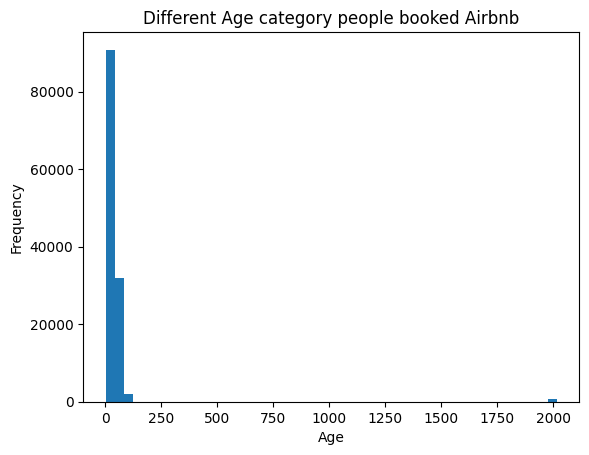

In [ ]:
# plotting histogram for Age to find the distribution
plt.hist(train_users_df['age'],bins=50)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Different Age category people booked Airbnb')
plt.show()

The above histogram shows the age has invalid data since age cannot be more than 130 to 140

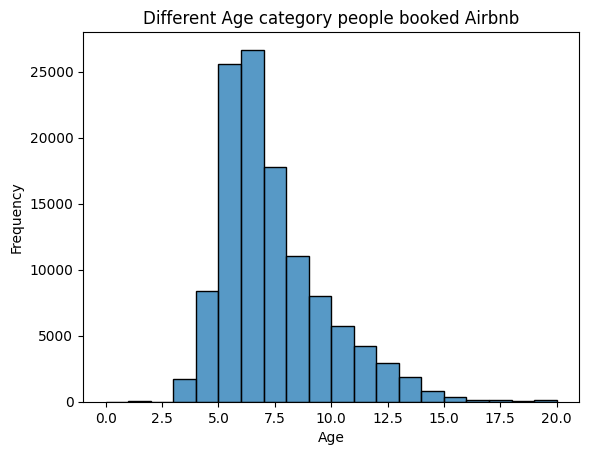

In [26]:
# Plotting age after data wrangling
sns.histplot(final_df['age_bucket'],bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Different Age category people booked Airbnb')
plt.show()

After wrangling age distribution is bettwe without impurities and slightly right skewed

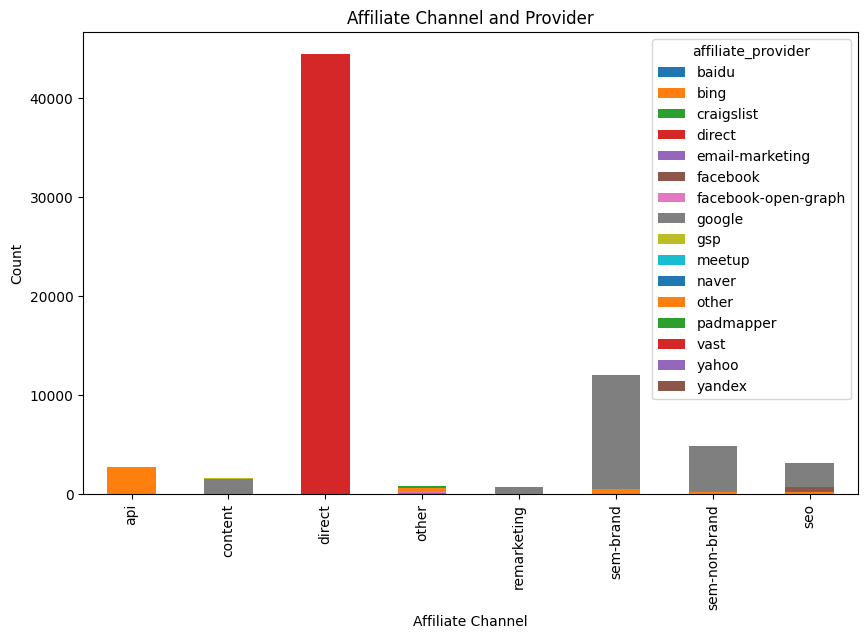

In [ ]:
# Creating visualization to understand the pattern between affiliate channel and provider
count_df = final_df.groupby(['affiliate_channel','affiliate_provider']).size().unstack(fill_value=0)
ax = count_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Affiliate Channel')
plt.ylabel('Count')
plt.title('Affiliate Channel and Provider')
plt.show()

EDA shows direct affiliate and provider is high in number, followed by google browser  

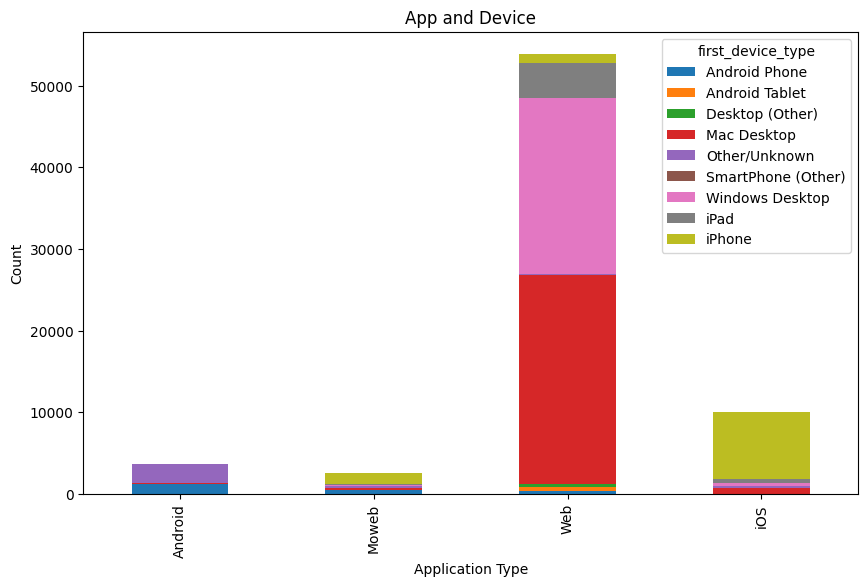

In [ ]:
# Finding relation between signup_app and first_device_type
count_df = final_df.groupby(['signup_app','first_device_type']).size().unstack(fill_value=0)
ax = count_df.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Application Type')
plt.ylabel('Count')
plt.title('App and Device')
plt.show()

People used mac and windows device and web browser to signup, people also used Iphone in considerable number

In [32]:
# train data is further divided to validate the accuracy
train, validate = train_test_split(final_df,train_size=0.8,random_state=41)

In [33]:
# Separating target and feature columns
X_train = train.drop(['country_destination'],axis=1)
y_train = train['country_destination']
X_validate = validate.drop(['country_destination'],axis=1)
y_validate = validate['country_destination']

In [90]:
#Creating Decision Tree pipeline
model_DT = make_pipeline(ce.OrdinalEncoder(),SimpleImputer(strategy="mean"),
                         StandardScaler(),DecisionTreeClassifier(random_state=41,max_depth=8,max_features=9))
model_DT.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['id', 'gender', 'signup_method',
                                      'language', 'affiliate_channel',
                                      'affiliate_provider',
                                      'first_affiliate_tracked', 'signup_app',
                                      'first_device_type', 'first_browser'],
                                mapping=[{'col': 'id', 'data_type': dtype('O'),
                                          'mapping': t70sr5xfol         1
clhb8xm3gh         2
ss27aix5v4         3
bh13jsc2zz         4
q3pxowokdj         5
               ...  
o91ti5o5v4    162682
nwfik2iox...
Conkeror              34
Avant Browser         35
SlimBrowser           36
Pale Moon             37
TenFourFox            38
Arora                 39
IceDragon             40
Flock                 41
Opera Mobile          42
OmniWeb               43
Comodo Dragon         44
NetNewsWire           45
Opera Mini            46
Stainless             47
Outlook 2007          48
NaN                   -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=8, max_features=9,
                                        random_state=41))])

In [91]:
#Validating accuracy for decision tree
training_accuracy_DT = accuracy_score(model_DT.predict(X_train),y_train)
validate_accuracy_DT = accuracy_score(model_DT.predict(X_validate),y_validate)
print('Training Accuracy Score:', training_accuracy_DT)
print('Validation Accuracy Score:', validate_accuracy_DT)

Training Accuracy Score: 0.6654823739127762
Validation Accuracy Score: 0.6545780881195908


In [36]:
# Creating RandomForest Model pipeline
model_RF = make_pipeline(ce.OrdinalEncoder(),SimpleImputer(strategy='most_frequent'),
                         StandardScaler(),RandomForestClassifier(random_state=41,n_estimators=40,max_features=10))
model_RF.fit(X_train,y_train)

Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['id', 'gender', 'signup_method',
                                      'language', 'affiliate_channel',
                                      'affiliate_provider',
                                      'first_affiliate_tracked', 'signup_app',
                                      'first_device_type', 'first_browser'],
                                mapping=[{'col': 'id', 'data_type': dtype('O'),
                                          'mapping': t70sr5xfol         1
clhb8xm3gh         2
ss27aix5v4         3
bh13jsc2zz         4
q3pxowokdj         5
               ...  
o91ti5o5v4    162682
nwfik2iox...
SlimBrowser           36
Pale Moon             37
TenFourFox            38
Arora                 39
IceDragon             40
Flock                 41
Opera Mobile          42
OmniWeb               43
Comodo Dragon         44
NetNewsWire           45
Opera Mini            46
Stainless             47
Outlook 2007          48
NaN                   -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_features=10, n_estimators=40,
                                        random_state=41))])

In [37]:
#Validating accuracy for random forest
training_accuracy_RF = accuracy_score(model_RF.predict(X_train),y_train)
validate_accuracy_RF = accuracy_score(model_RF.predict(X_validate),y_validate)
print('Training Accuracy Score:', training_accuracy_RF)
print('Validation Accuracy Score:', validate_accuracy_RF)

Training Accuracy Score: 0.9977871346467099
Validation Accuracy Score: 0.5757031864673485


In [71]:
# Cross Validation for Decision Tree

cv_scores_DT = cross_val_score(model_DT,X_train,y_train,cv=5,scoring='accuracy')
print('CV scores DecisionTreeClassifier')
print(cv_scores_DT)
print('Mean CV accuracy score:', cv_scores_DT.mean())
print('STD CV accuracy score:', cv_scores_DT.std())



CV scores DecisionTreeClassifier
[0.62673264 0.66256877 0.66800873 0.66315272 0.57233304]
Mean CV accuracy score: 0.6385591787810799
STD CV accuracy score: 0.03626112918825461


In [72]:
# Cross Validation for Random Forest
cv_scores_RF = cross_val_score(model_RF,X_train,y_train,cv=5,scoring='accuracy')
print('CV score RandomForestClassifier')
print(cv_scores_RF)
print('Mean CV accuracy score:', cv_scores_RF.mean())
print('STD CV accuracy score:', cv_scores_RF.std())

CV score RandomForestClassifier
[0.60912192 0.51777976 0.54559425 0.53760334 0.38900329]
Mean CV accuracy score: 0.5198205120324554
STD CV accuracy score: 0.07221158782955074


In [87]:
# Finding keys to use in RandomizedSearchCV
model_DT.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'ordinalencoder', 'simpleimputer', 'standardscaler', 'decisiontreeclassifier', 'ordinalencoder__cols', 'ordinalencoder__drop_invariant', 'ordinalencoder__handle_missing', 'ordinalencoder__handle_unknown', 'ordinalencoder__mapping', 'ordinalencoder__return_df', 'ordinalencoder__verbose', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__keep_empty_features', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontr

In [89]:
# Performing Random Search of hyperparameters for decision Tree
param_dist = {'simpleimputer__strategy':['mean','median','most_frequent'],'decisiontreeclassifier__max_depth': [8,9,10],'decisiontreeclassifier__max_features': [8,9,10.11,12]}
final_model = RandomizedSearchCV(model_DT,param_dist,cv=3,scoring='accuracy')
final_model.fit(X_train,y_train)
best_score = final_model.best_score_
best_params = final_model.best_params_

print('Best score for `model`:', best_score)
print('Best params for `model`:', best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/

Best score for `model`: 0.57938929183212
Best params for `model`: {'simpleimputer__strategy': 'most_frequent', 'decisiontreeclassifier__max_features': 9, 'decisiontreeclassifier__max_depth': 8}


In [ ]:
#Performing Random Search of hyperparameters for Random Forest
model_RF = make_pipeline(ce.OrdinalEncoder(),SimpleImputer(strategy='most_frequent'),
                         StandardScaler(),RandomForestClassifier(random_state=41,n_estimators=40,max_features=20,n_jobs=-1))
model_RF.fit(X_train,y_train)

In [94]:
y_pred_DT = model_DT.predict(test_df)
submission_DT = pd.DataFrame(y_pred_DT,columns=['country'])
submission_DT['id'] = test_df['id']
submission_DT.to_csv('/content/drive/MyDrive/Airbnb New User Bookings/submissionDT.csv',index=False)